# Prospeção de Dados 2021/2022
## Third Home Assignment - Clustering 
### Group 4
Students
- Catarina Canastra, nº57766
- Daniel Dias, nº59056
- João Raimundo, nº57454

### 0.1. Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, calinski_harabasz_score
from scipy.spatial.distance import pdist, squareform

from kneed import KneeLocator

### 0.2. Import Data

In [3]:
data = pd.read_csv("jena_climate_2009_2016.csv", sep=",", index_col="Date Time", parse_dates=[0])

In [4]:
data.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [6]:
print(data.shape)

(420551, 14)


### 0.3. Data Pre-processing

#### Split Data - Midnight (00:00:00) / Noon (12:00:00)

**Midnight (00:00:00)**

In [7]:
midnight_dt = data.at_time('00:00:00')
midnight_dt.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-02-01,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
2009-03-01,1002.32,-4.71,268.27,-6.09,90.0,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
2009-04-01,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
2009-05-01,985.07,-1.47,272.86,-2.45,93.0,5.48,5.10,0.38,3.23,5.18,1260.58,1.42,3.00,239.80
2009-06-01,997.60,-12.63,260.71,-15.07,81.8,2.31,1.89,0.42,1.18,1.89,1332.96,1.60,2.63,355.50


In [8]:
midnight_dt.shape

(2920, 14)

**Noon (12:00:00)**

In [9]:
noon_dt = data.at_time('12:00:00')
noon_dt.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
2009-02-01 12:00:00,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
2009-03-01 12:00:00,999.02,-5.96,267.28,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90
2009-04-01 12:00:00,988.94,-1.21,272.82,-2.36,91.8,5.59,5.13,0.46,3.23,5.19,1264.30,1.99,3.88,225.80
2009-05-01 12:00:00,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44


In [10]:
noon_dt.shape

(2921, 14)

**Concatenate Midnight and Noon Dataframes**

In [11]:
midnight_noon_dt = pd.concat([midnight_dt, noon_dt])
midnight_noon_dt.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-02-01,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
2009-03-01,1002.32,-4.71,268.27,-6.09,90.0,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
2009-04-01,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
2009-05-01,985.07,-1.47,272.86,-2.45,93.0,5.48,5.10,0.38,3.23,5.18,1260.58,1.42,3.00,239.80
2009-06-01,997.60,-12.63,260.71,-15.07,81.8,2.31,1.89,0.42,1.18,1.89,1332.96,1.60,2.63,355.50


In [12]:
midnight_noon_dt.shape

(5841, 14)

#### Scaling and Standardize Data

**Scaling**

In [13]:
scaler_mm = MinMaxScaler()
midnight_mm = scaler_mm.fit_transform(midnight_dt)  # scale midnight dataframe
noon_mm = scaler_mm.fit_transform(noon_dt)  # scale noon dataframe
midnight_noon_mm = scaler_mm.fit_transform(midnight_noon_dt)  # scale midnight_noon dataframe

**Standardize**

In [14]:
scaler_ss = StandardScaler()
midnight_ss = scaler_ss.fit_transform(midnight_mm)  # midnight array standardization
noon_ss = scaler_ss.fit_transform(noon_mm)  # noon array standardization
midnight_noon_ss = scaler_ss.fit_transform(midnight_noon_mm)  # midnight_noon array standardization

# tranform into dataframe

midnight_standard = pd.DataFrame(data=midnight_ss)
noon_standard = pd.DataFrame(data=noon_ss)
midnight_noon_standard = pd.DataFrame(data=midnight_noon_ss)

### Inspect the Transformed Data

**Midnight**

In [15]:
midnight_standard.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03,2.920000e+03
mean,-2.551232e-16,-9.596585e-17,3.883499e-16,-3.115468e-16,-4.194894e-16,4.615790e-17,-2.343635e-16,-7.136605e-17,-6.440814e-17,1.059274e-16,-1.758107e-16,-1.915515e-16,-4.210863e-17,-1.250201e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-4.800571e+00,-3.962997e+00,-3.977618e+00,-4.154911e+00,-3.602976e+00,-1.932825e+00,-2.060051e+00,-1.041887e+00,-2.054028e+00,-2.060453e+00,-2.489856e+00,-1.292278e+00,-1.423940e+00,-2.250939e+00
25%,-5.988251e-01,-7.167003e-01,-7.105331e-01,-7.108891e-01,-6.645349e-01,-7.996005e-01,-8.029810e-01,-7.206797e-01,-7.977200e-01,-7.990527e-01,-7.410520e-01,-7.004383e-01,-6.872266e-01,-2.964860e-01
50%,5.379161e-02,7.410371e-02,6.206778e-02,4.989558e-02,1.638223e-01,-1.352341e-01,-1.490627e-01,-3.280931e-01,-1.567075e-01,-1.540186e-01,-1.163998e-01,-2.643462e-01,-2.662476e-01,2.507362e-01
75%,6.511222e-01,7.493471e-01,7.464969e-01,7.510693e-01,8.229452e-01,6.445366e-01,6.644068e-01,4.035456e-01,6.595596e-01,6.612327e-01,6.663535e-01,4.287288e-01,4.283678e-01,6.161632e-01
max,3.089721e+00,2.746358e+00,2.689654e+00,2.451471e+00,1.588953e+00,4.703598e+00,3.853014e+00,8.786162e+00,3.900816e+00,3.881028e+00,4.392946e+00,7.250455e+00,7.069311e+00,2.152548e+00


**Noon**

In [16]:
noon_standard.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03
mean,-2.555679e-16,2.356516e-16,-1.676927e-16,-2.690229e-16,-2.419040e-16,5.754460e-17,1.603191e-16,1.584567e-16,1.804635e-16,-1.616114e-16,2.658302e-16,8.088227e-16,-3.728666e-15,2.492776e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-4.915930e+00,-3.189113e+00,-3.198481e+00,-3.600519e+00,-2.855751e+00,-1.591887e+00,-1.981581e+00,-1.063758e+00,-1.974812e+00,-1.978463e+00,-2.374676e+00,-5.403462e+01,-5.403188e+01,-1.909458e+00
25%,-5.914752e-01,-7.363670e-01,-7.283617e-01,-6.857810e-01,-7.784728e-01,-7.869344e-01,-7.816314e-01,-7.725293e-01,-7.857901e-01,-7.857047e-01,-7.414416e-01,1.158403e-02,8.106453e-03,-9.569117e-01
50%,5.368164e-02,3.407577e-02,2.199745e-02,4.328015e-02,-8.799387e-03,-2.042698e-01,-1.530862e-01,-3.218178e-01,-1.481441e-01,-1.481554e-01,-7.819166e-02,1.661000e-02,1.631886e-02,2.161521e-01
75%,6.583674e-01,7.626590e-01,7.521374e-01,7.437211e-01,7.728814e-01,6.051737e-01,6.540231e-01,5.119984e-01,6.582904e-01,6.587797e-01,6.912075e-01,2.352746e-02,2.588198e-02,6.890150e-01
max,3.016404e+00,2.684806e+00,2.679707e+00,2.453400e+00,1.961613e+00,4.688316e+00,3.820558e+00,6.132024e+00,3.861524e+00,3.841821e+00,3.725613e+00,6.773433e-02,9.255372e-02,2.180352e+00


**Midnight and Noon**

In [17]:
midnight_noon_standard.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03
mean,-1.224077e-16,2.190414e-16,-3.293224e-16,-7.365373e-16,-5.175529e-16,-6.047019e-16,-3.866488e-16,-3.628515e-17,3.257871e-17,-4.045158e-16,-3.942138e-17,-1.262178e-16,4.462085e-15,-1.492842e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-4.944522e+00,-3.706323e+00,-3.729038e+00,-4.204700e+00,-3.431259e+00,-1.652972e+00,-2.072369e+00,-8.878649e-01,-2.066101e+00,-2.072735e+00,-2.670968e+00,-7.641374e+01,-7.640575e+01,-2.063405e+00
25%,-5.945187e-01,-7.248252e-01,-7.168036e-01,-7.078306e-01,-7.009745e-01,-7.600097e-01,-7.990676e-01,-6.761826e-01,-7.965500e-01,-7.955283e-01,-7.243956e-01,3.761278e-03,-1.548452e-03,-5.656251e-01
50%,5.253983e-02,1.574811e-02,1.246165e-02,4.395901e-02,1.596113e-01,-2.080913e-01,-1.540243e-01,-3.659947e-01,-1.542175e-01,-1.510011e-01,-6.227705e-02,9.951046e-03,8.841563e-03,2.776821e-01
75%,6.541488e-01,7.191127e-01,7.155543e-01,7.508209e-01,8.273610e-01,5.377796e-01,6.636701e-01,3.172570e-01,6.619226e-01,6.617666e-01,6.479863e-01,1.896824e-02,2.320423e-02,6.565253e-01
max,3.079721e+00,3.076464e+00,3.065145e+00,2.468555e+00,1.576239e+00,5.698998e+00,3.876897e+00,7.812067e+00,3.918926e+00,3.898620e+00,4.225403e+00,8.759060e-02,1.264168e-01,2.156650e+00


### 0.4. Functions Definition

## Objective 1 - Cluster the Data at Noon and Midnight

### 1.1. Rows collected at Noon

**1.1.1. The Elbow Method**

In [42]:
def avgDist(X, labels):
    D = pdist(X, metric='euclidean')
    dmatrix = squareform(D, checks=True)
    N = len(labels)
    L = list(set(labels))
    L.sort()
    result = 0
    for i in L:
        Nc = sum(labels == i)
        S = 0
        if Nc > 1: S = np.sum(dmatrix[labels == i, :][:, labels == i]) / (Nc * (Nc - 1))
        result += S * Nc / N
    return result


ads = []  # average euclidean distance
KS = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]  # considered number of clusters
for K in KS:
    #kms = KMeans(n_clusters=K).fit(noon_standard)
    hac = AgglomerativeClustering(n_clusters=K).fit(noon_standard)
    ad = avgDist(noon_standard, hac.labels_)
    #print("%3d --> %7.4f"% (K, ad))
    ads.append(ad)

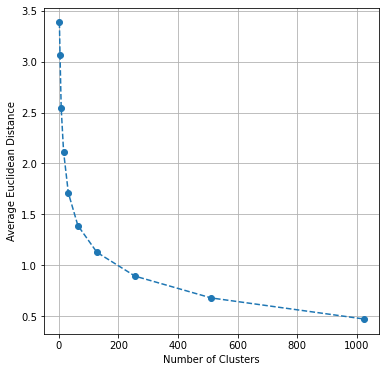

In [43]:
plt.figure(figsize=(6, 6))
plt.plot(KS, ads, "--o")
plt.ylabel('Average Euclidean Distance')
plt.xlabel('Number of Clusters')
plt.grid()
plt.show()

Elbow Point: 128
Knee Point: 128


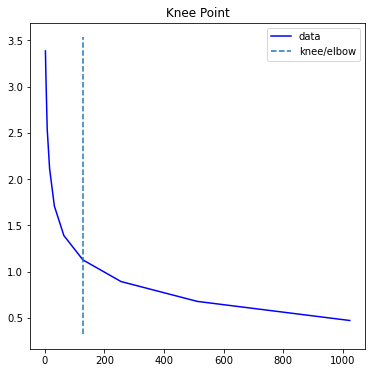

In [44]:
kl = KneeLocator(KS, ads, curve="convex", direction="decreasing")

print("Elbow Point:", kl.elbow)
print("Knee Point:", kl.knee)
kl.plot_knee()

In [37]:
def cluster_analysis(X):
    results = []

    clusters = [2, 4, 8, 16, 32, 64, 128, 256]  # list with number of clusters
    linkage = ['ward', 'complete', 'average', 'single']  # inkage criterion to use

    for k in clusters:

        kms = KMeans(n_clusters=k, random_state=0).fit(X)
        kms_sscore = silhouette_score(X, kms.labels_)
        kms_cscore = calinski_harabasz_score(X, kms.labels_)
        result_kms = {'Number of Clusters': k, 'Algorithm': 'Kmeans', 'Hyperparameters': '-',
                      'Silhouette Score': kms_sscore, 'Calinski Harabasz Score': kms_cscore}
        results.append(result_kms)

        for l in linkage:
            hac = AgglomerativeClustering(linkage=l, n_clusters=k).fit(X)
            hac_sscore = silhouette_score(X, hac.labels_)
            hac_cscore = calinski_harabasz_score(X, hac.labels_)
            result_hac = {'Number of Clusters': k, 'Algorithm': 'Agglomerative Clustering',
                          'Hyperparameters': "linkage: " + l, 'Silhouette Score': hac_sscore,
                          'Calinski Harabasz Score': hac_cscore}
            results.append(result_hac)

    for eps in np.arange(0.1, 3, 0.5):
        for Nmin in range(3, 10):
            dbs = DBSCAN(eps=eps, min_samples=Nmin).fit(X)
            # We take into account the 'noise' cluster (in DBSCAN it's the first cluster created with id -1),
            # and we are only interested in results with more than 1 'real' cluster
            unique_labels = len(np.unique(dbs.labels_)) - 1
            # We want the cases where 2 or more 'real' clusters were found
            if unique_labels > 1:
                dbs_cscore = calinski_harabasz_score(X, dbs.labels_ + 1)
                dbs_sscore = silhouette_score(X, dbs.labels_ + 1)
                result_dbs = {'Number of Clusters': unique_labels, 'Algorithm': 'DBSCAN',
                              'Hyperparameters': f'eps={eps}, min_samples={Nmin}', 'Silhouette Score': dbs_sscore,
                              'Calinski Harabasz Score': dbs_cscore}
                results.append(result_dbs)

    cluster_results = pd.DataFrame(data=results)

    return cluster_results

In [38]:
cluster_analysis_results = cluster_analysis(noon_standard)
cluster_analysis_results

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
0,2,Kmeans,-,0.386097,2011.485737
1,2,Agglomerative Clustering,linkage: ward,0.365774,1886.856320
2,2,Agglomerative Clustering,linkage: complete,0.941798,487.563526
3,2,Agglomerative Clustering,linkage: average,0.941798,487.563526
4,2,Agglomerative Clustering,linkage: single,0.941798,487.563526
5,4,Kmeans,-,0.265484,1717.946236
6,4,Agglomerative Clustering,linkage: ward,0.291930,1548.957883
7,4,Agglomerative Clustering,linkage: complete,0.282618,1284.843908
8,4,Agglomerative Clustering,linkage: average,0.207408,396.601698
9,4,Agglomerative Clustering,linkage: single,0.287787,167.273790


### 1.2. Rows collected at Noon and Midnight

## Objective 2 - Cluster all the data